## 1. diabates 당뇨병 분류를 CNN으로 구현하고 모델을 저장하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./diabetes.csv", index_col=None)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Text(0.5, 1.0, 'Outcome')

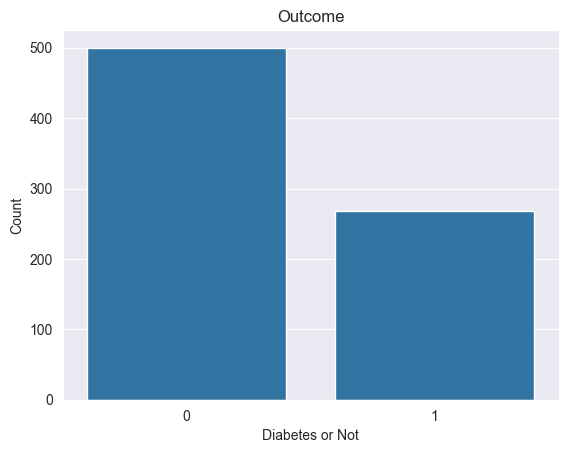

In [4]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Outcome")
plt.xlabel("Diabetes or Not")
plt.ylabel("Count")
plt.title("Outcome")

In [5]:
# 레이블 갯수 확인 (숫자)
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [6]:
# 결측치 확인
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

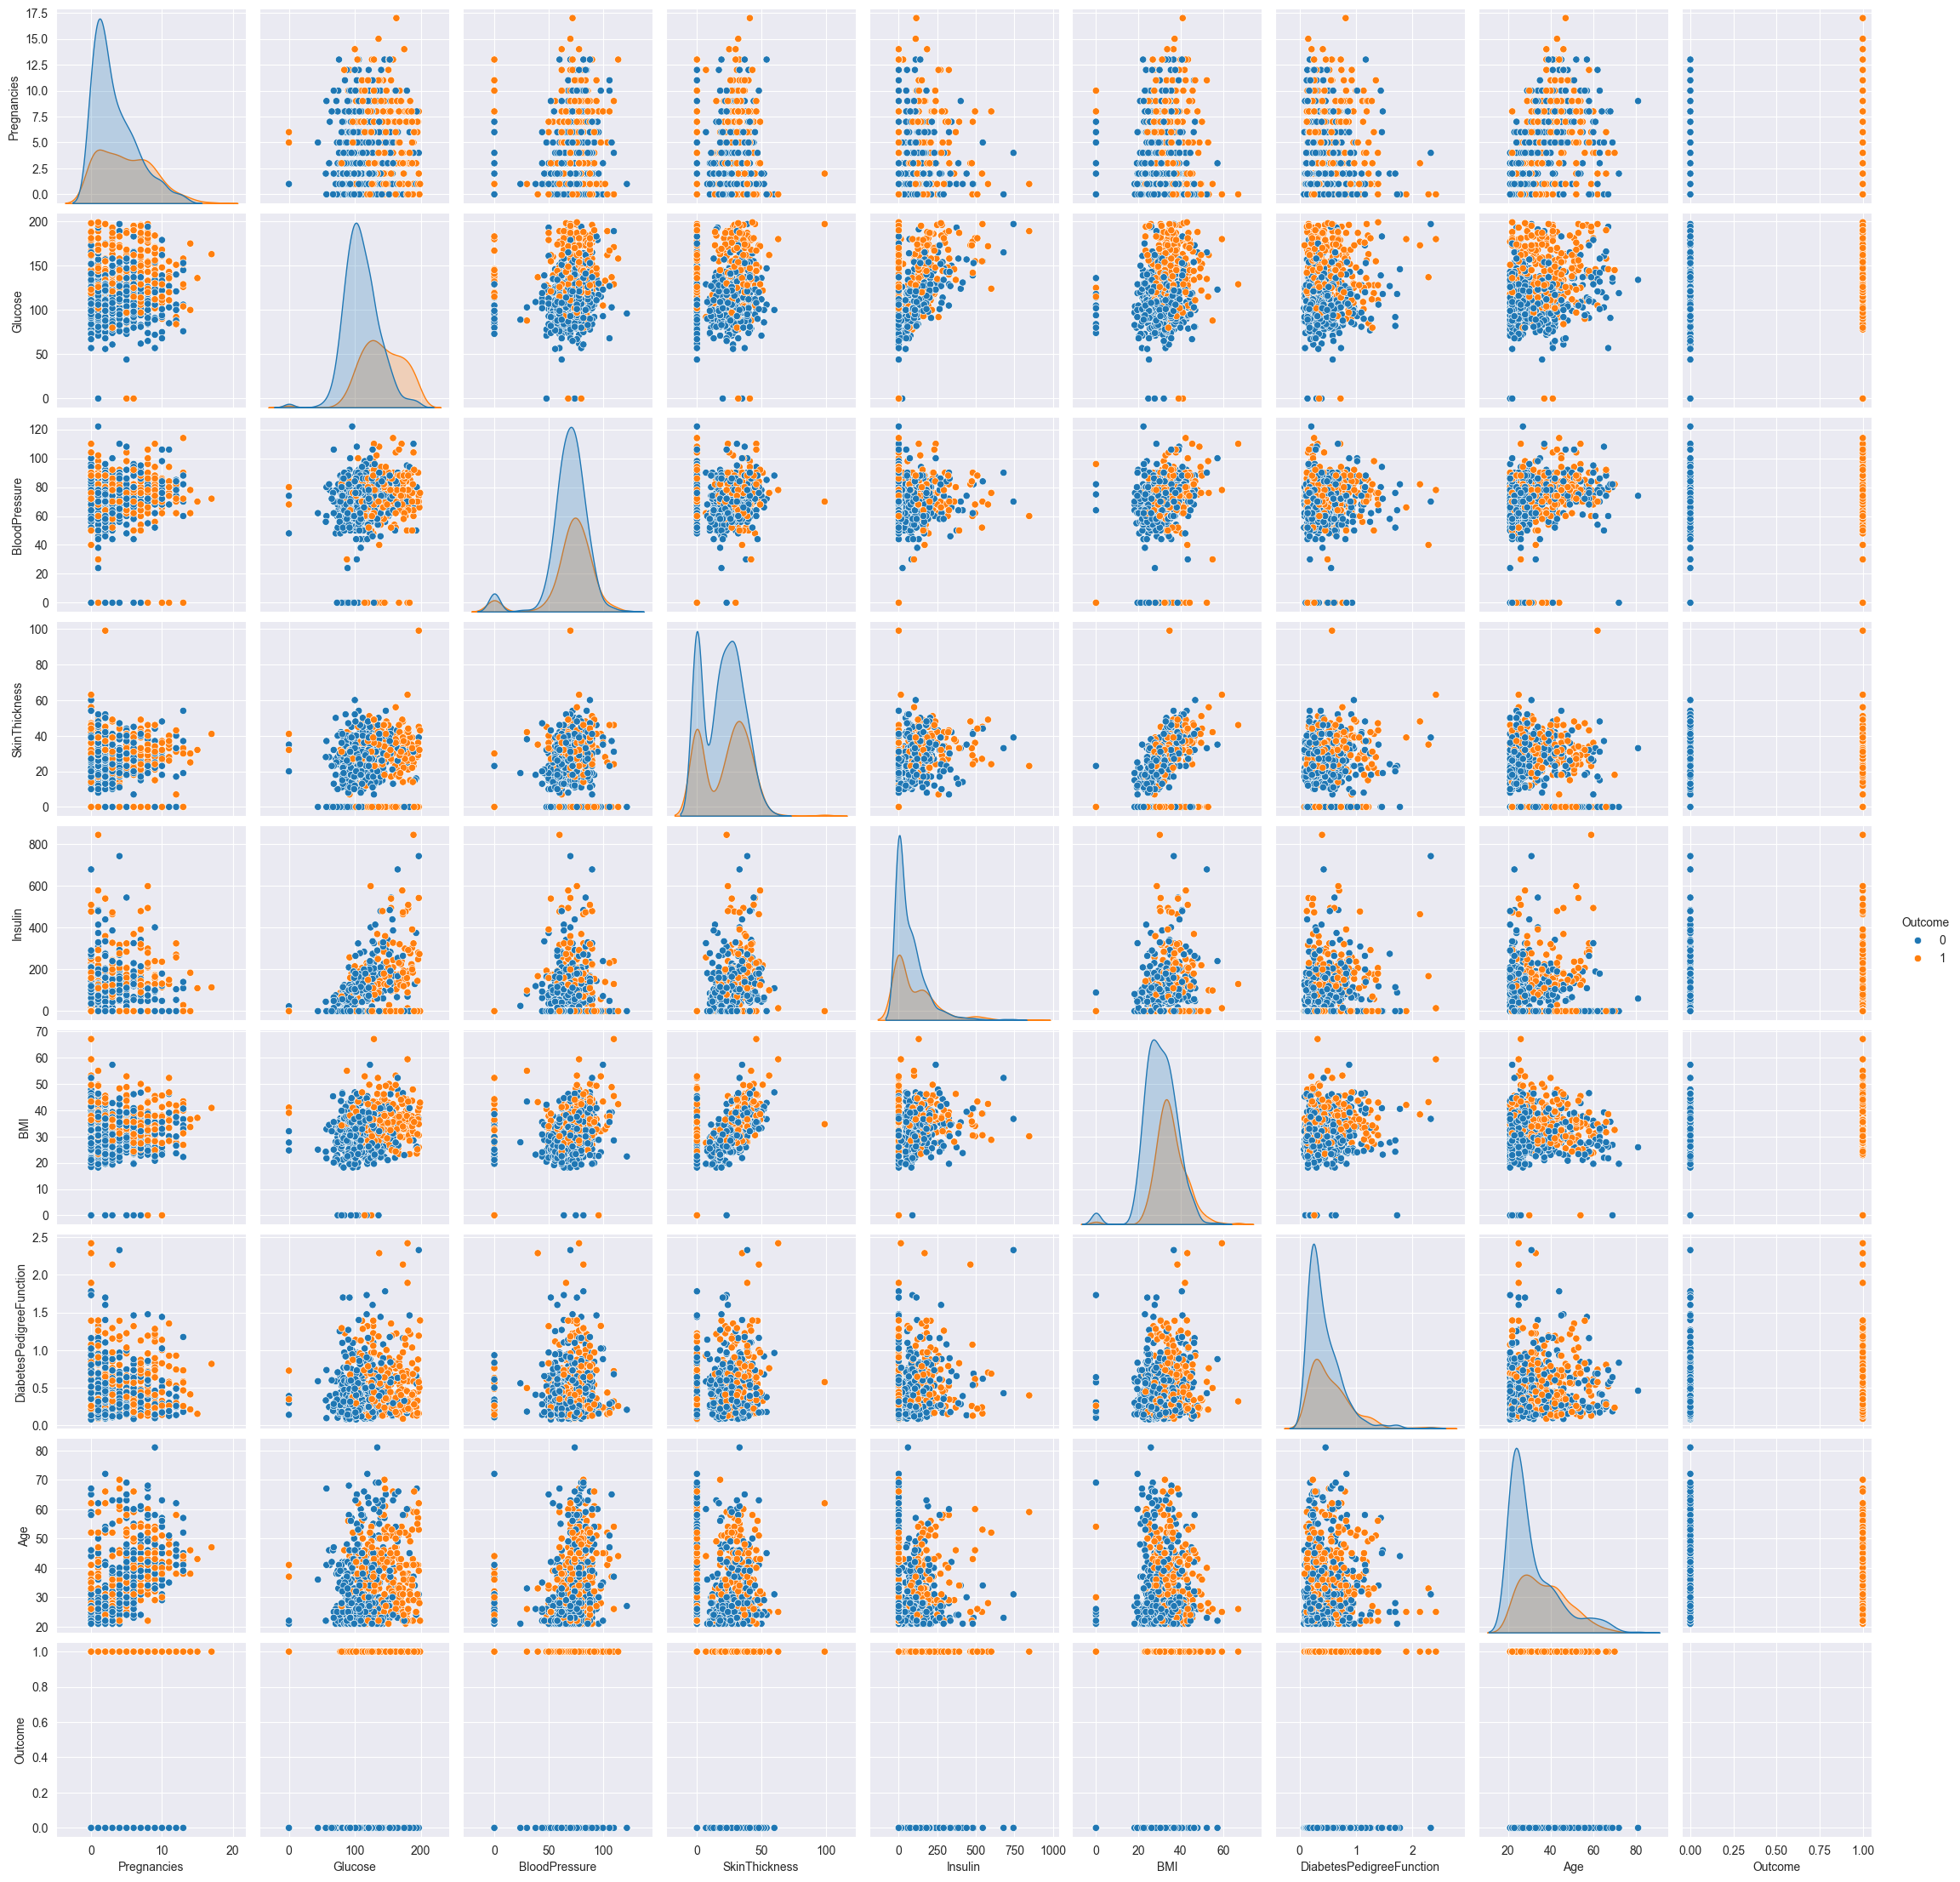

In [7]:
# pairplot을 그릴 때 변수 리스트를 사용
sns.pairplot(df, vars=df.columns, hue='Outcome')
plt.show()

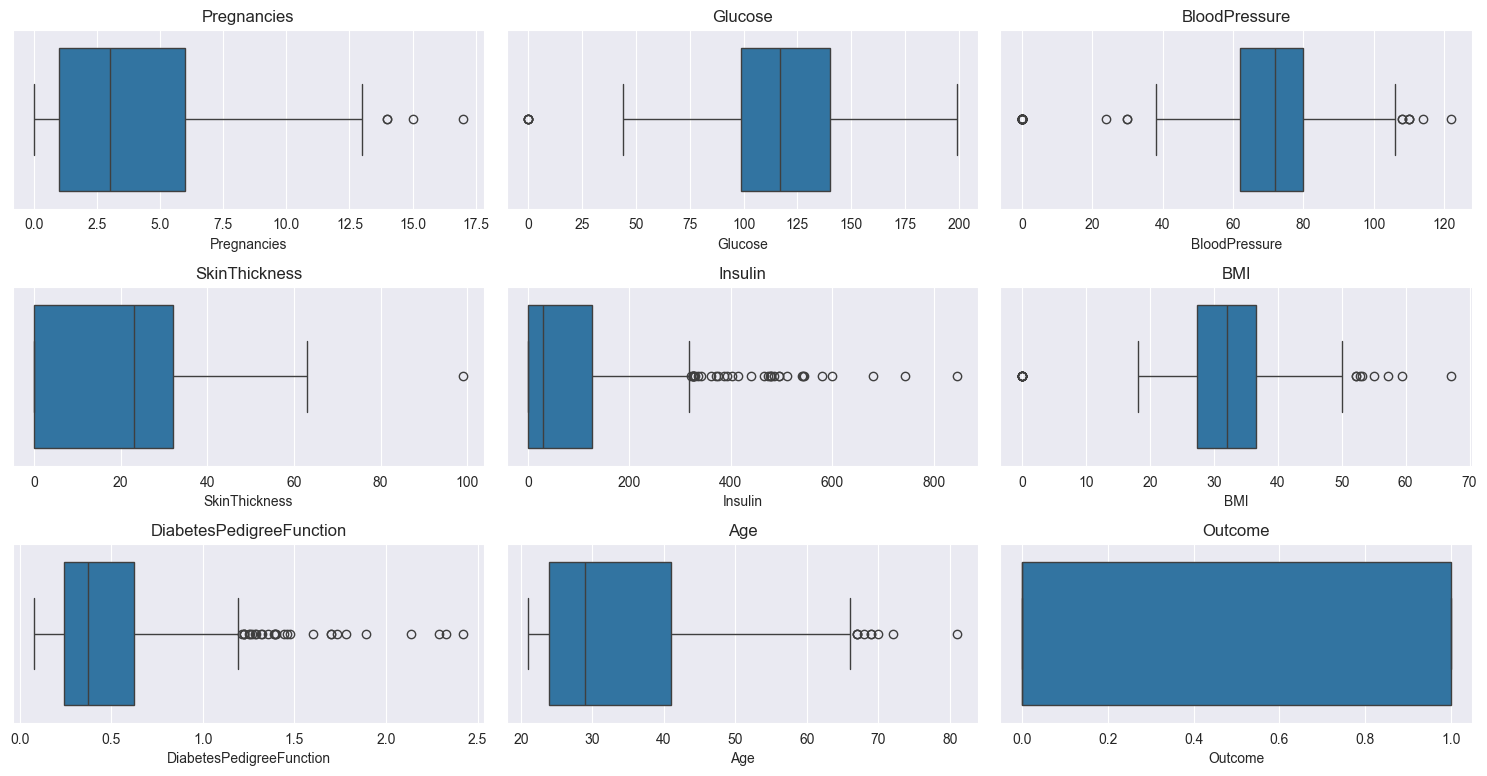

In [8]:
# 데이터프레임의 수치형 칼럼들을 선택
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# 박스플롯을 각 수치형 칼럼에 대해 반복적으로 그리기
plt.figure(figsize=(15, 10))  # 적절한 사이즈로 설정
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns) // 3 + 1, 3, i)
    sns.boxplot(x=column, data=df)
    plt.title(column)

plt.tight_layout()  # 레이아웃 조정
plt.show()

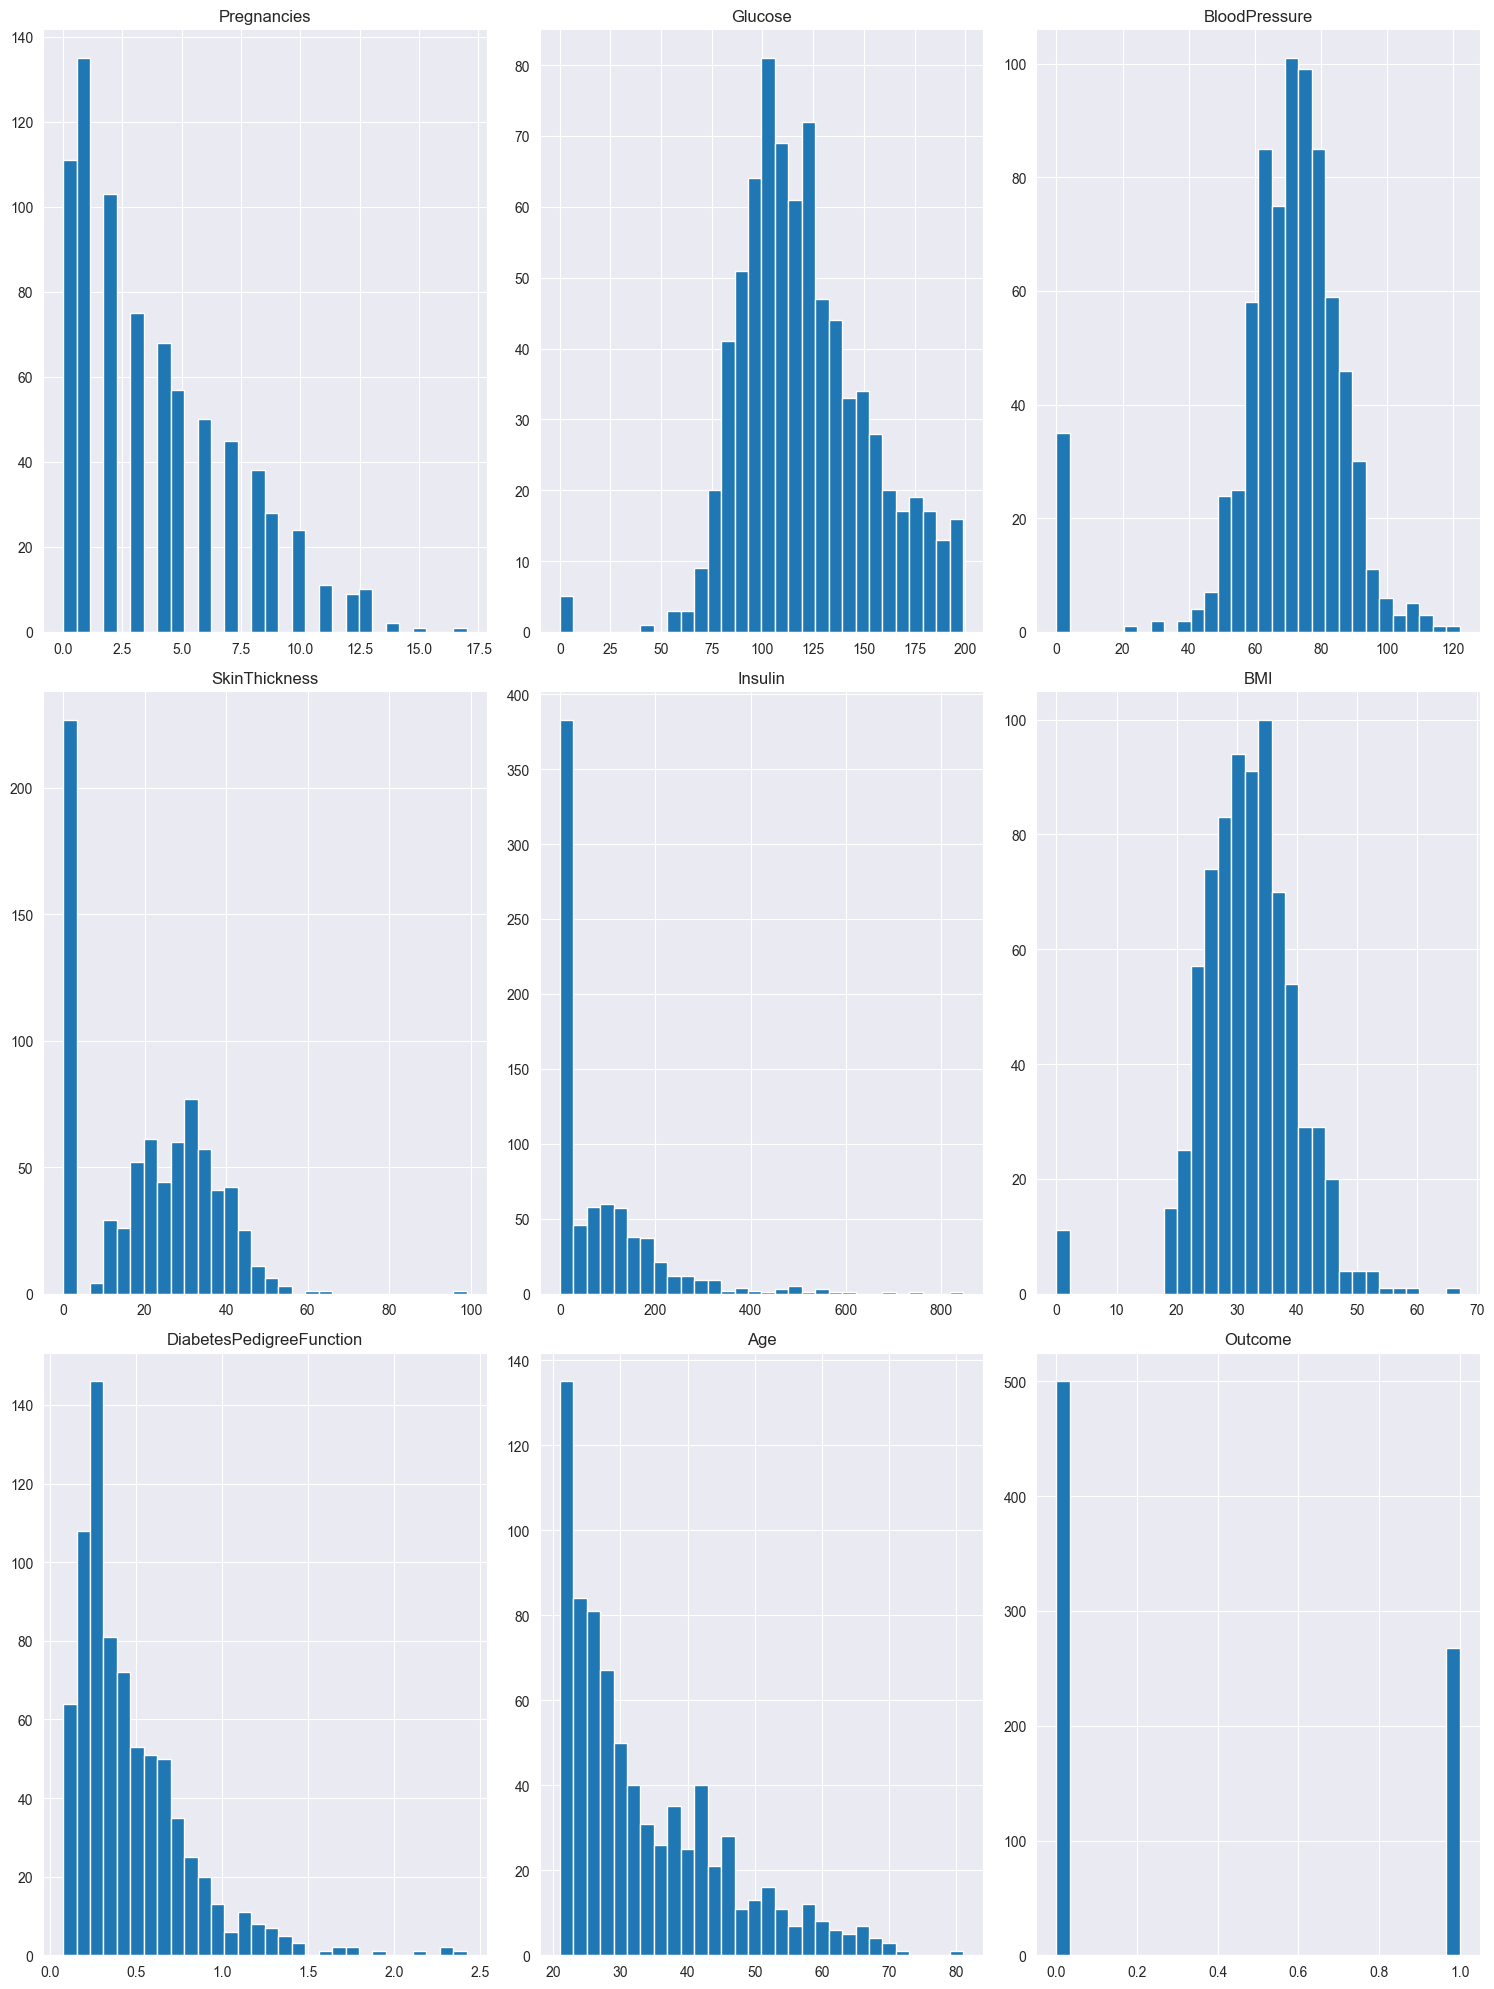

In [9]:
# 각 컬럼별 히스토그램을 그리는 코드
df.hist(figsize=(15, 20), bins=30)  # ax 인수 없이 자동으로 서브플롯 생성
plt.tight_layout()  # 서브플롯 간격을 자동으로 조정
plt.show()

In [10]:
X=df.drop('Outcome',axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [11]:
y=df['Outcome']
y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [12]:
print(X.dtypes)
print(y.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
dtype: object
int64


In [13]:
X = X.astype('float32')

In [14]:
from tensorflow.keras.utils import to_categorical

X = X.values
Y = to_categorical(y)
print(X.shape)
print(y.shape)

(768, 8)
(768,)


In [15]:
X = X.reshape((X.shape[0], X.shape[1], 1))
X.shape

(768, 8, 1)

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.25,random_state=0)

In [17]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Conv1D 모델 생성
model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='sigmoid'))  # 분류 문제일 경우

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)
# 원핫 이코딩을 했으므로 np.argmax를 사용
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30


2024-10-02 16:39:42.604417: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


18/18 [==============================] - 0s 8ms/step - loss: 0.9637 - accuracy: 0.6111 - val_loss: 0.6959 - val_accuracy: 0.6094
Epoch 2/30
18/18 [==============================] - 0s 2ms/step - loss: 0.8942 - accuracy: 0.6146 - val_loss: 0.8229 - val_accuracy: 0.5781
Epoch 3/30
18/18 [==============================] - 0s 2ms/step - loss: 0.7469 - accuracy: 0.6701 - val_loss: 0.6820 - val_accuracy: 0.6875
Epoch 4/30
18/18 [==============================] - 0s 2ms/step - loss: 0.7515 - accuracy: 0.6250 - val_loss: 0.6992 - val_accuracy: 0.6562
Epoch 5/30
18/18 [==============================] - 0s 2ms/step - loss: 0.7211 - accuracy: 0.6684 - val_loss: 0.6230 - val_accuracy: 0.6875
Epoch 6/30
18/18 [==============================] - 0s 2ms/step - loss: 0.6239 - accuracy: 0.6806 - val_loss: 0.6517 - val_accuracy: 0.6406
Epoch 7/30
18/18 [==============================] - 0s 2ms/step - loss: 0.6161 - accuracy: 0.7031 - val_loss: 0.6353 - val_accuracy: 0.6719
Epoch 8/30
18/18 [=============

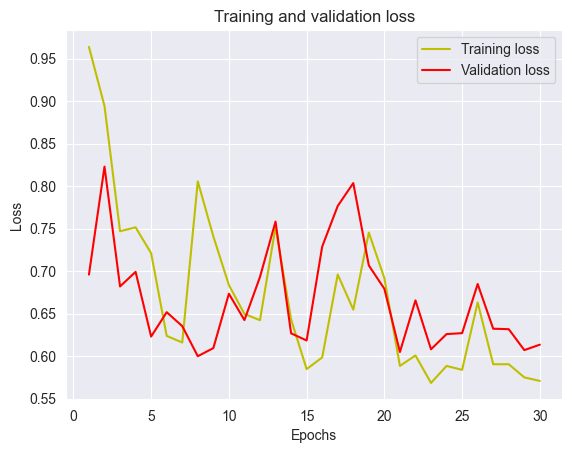

In [19]:
import matplotlib.pyplot as plt

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

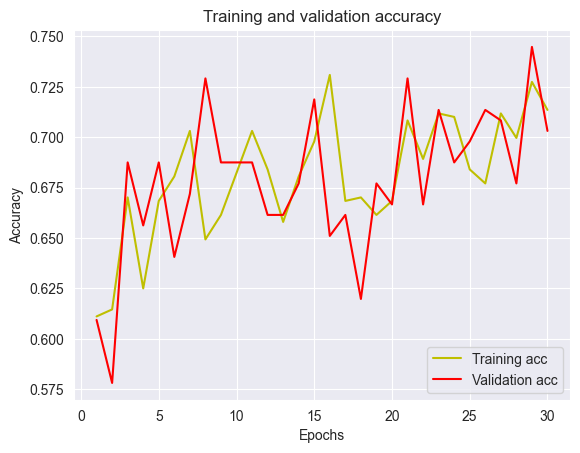

In [20]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [21]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class, zero_division=0))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79       130
           1       0.55      0.44      0.49        62

    accuracy                           0.70       192
   macro avg       0.65      0.63      0.64       192
weighted avg       0.69      0.70      0.69       192

[[108  22]
 [ 35  27]]


In [22]:
import tensorflow as tf
model_file='./models/cnn_model.h5'
  
tf.keras.models.save_model(model, model_file, include_optimizer=False)
print('model saved at ', model_file)

model saved at  ./models/cnn_model.h5
